<a href="https://colab.research.google.com/github/mahamunigirish/Machine-Learning-Practice-/blob/main/Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
cd '/content/drive/MyDrive/student'

/content/drive/MyDrive/student


In [12]:
ls

cleanedMathData.csv  student-merge.R  student.txt
student-mat.csv      student-por.csv


In [13]:
import pandas as pd
import numpy as np  
import tensorflow as tf
from tensorflow import keras 
import os 

In [14]:
mathData  =  pd.read_csv('student-mat.csv' , sep = ';')

In [15]:
mathData.head

<bound method NDFrame.head of     school sex  age address famsize Pstatus  ...  Walc  health absences  G1  G2  G3
0       GP   F   18       U     GT3       A  ...     1       3        6   5   6   6
1       GP   F   17       U     GT3       T  ...     1       3        4   5   5   6
2       GP   F   15       U     LE3       T  ...     3       3       10   7   8  10
3       GP   F   15       U     GT3       T  ...     1       5        2  15  14  15
4       GP   F   16       U     GT3       T  ...     2       5        4   6  10  10
..     ...  ..  ...     ...     ...     ...  ...   ...     ...      ...  ..  ..  ..
390     MS   M   20       U     LE3       A  ...     5       4       11   9   9   9
391     MS   M   17       U     LE3       T  ...     4       2        3  14  16  16
392     MS   M   21       R     GT3       T  ...     3       3        3  10   8   7
393     MS   M   18       R     LE3       T  ...     4       5        0  11  12  10
394     MS   M   19       U     LE3       T  .

We are just going to test G1 and G3 

In [18]:
unimathdata  =  mathData[['G1' , 'G3']]
unimathdata.head(5)

,G1,G3
0,5,6
1,5,6
2,7,10
3,15,15
4,6,10


In [19]:
unimathdata.to_csv('unimathdata.csv')

In [20]:
ls

cleanedMathData.csv  student-merge.R  student.txt
student-mat.csv      student-por.csv  unimathdata.csv


<h1>Data Visuallization </h1>

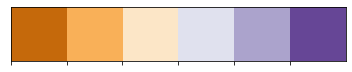

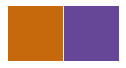

In [26]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [21]:
unimathdata.columns

Index(['G1', 'G3'], dtype='object')

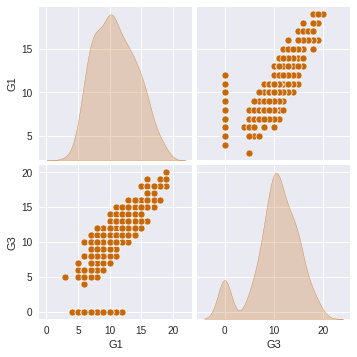

In [28]:
sns.pairplot(
    unimathdata , 
    x_vars = ['G1' , 'G3'],
    y_vars = ['G1' , 'G3'],
    diag_kind  = 'kde'
)

<h1>Data Splitting </h1>

In [30]:
trainDataset  =  unimathdata.sample(frac = 0.8 , random_state=0)
testDataset  =  unimathdata.drop(trainDataset.index)

print(trainDataset.head(5))
print(testDataset.head(5))

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [31]:
print(trainDataset.shape)
print(testDataset.shape)

(316, 2)
(79, 2)


In [37]:
trainFeatures  =  trainDataset.copy()
testFeatures  =  testDataset.copy()

print(trainFeatures.head(5))
print(testFeatures.head(5))

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [39]:
trainLabels  =  trainFeatures.pop('G3')
testLabels  =  testFeatures.pop('G3')

print(trainLabels.head(5))
print(testLabels.head(5))

# trainFeatures['G3']

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64


In [42]:
print(trainFeatures.head(5))
print(testFeatures.head(5))

     G1
329  14
318  11
317   9
65   16
59   15
    G1
9   14
25   6
28  11
31  17
32  17


univariate  - >  number of features  =  1 <br>
multivariate  - >  number of features  =  more than 1 

In [43]:
model  =  tf.keras.Sequential([tf.keras.layers.Dense(1)])

In [44]:
model.compile(
    loss='mean_absolute_error', #minimizing the MAE loss
    optimizer =tf.keras.optimizers.Adam(0.001), #learning rate specified as 0.001
    metrics = ['mae', 'mse']
)

In [45]:
numEpochs = 300
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/300
10/10 [==============================] - 1s 20ms/step - loss: 21.4281 - mae: 21.4281 - mse: 515.7576 - val_loss: 22.6387 - val_mae: 22.6387 - val_mse: 573.4844
Epoch 2/300
10/10 [==============================] - 0s 3ms/step - loss: 21.3106 - mae: 21.3106 - mse: 510.2914 - val_loss: 22.5140 - val_mae: 22.5140 - val_mse: 567.3455
Epoch 3/300
10/10 [==============================] - 0s 3ms/step - loss: 21.1932 - mae: 21.1932 - mse: 504.8824 - val_loss: 22.3892 - val_mae: 22.3892 - val_mse: 561.2374
Epoch 4/300
10/10 [==============================] - 0s 3ms/step - loss: 21.0749 - mae: 21.0749 - mse: 499.3830 - val_loss: 22.2651 - val_mae: 22.2651 - val_mse: 555.1909
Epoch 5/300
10/10 [==============================] - 0s 5ms/step - loss: 20.9578 - mae: 20.9578 - mse: 494.0063 - val_loss: 22.1404 - val_mae: 22.1404 - val_mse: 549.1520
Epoch 6/300
10/10 [==============================] - 0s 4ms/step - loss: 20.8402 - mae: 20.8402 - mse: 488.6904 - val_loss: 22.0158 - val_mae: 2

In [46]:
print(history)

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


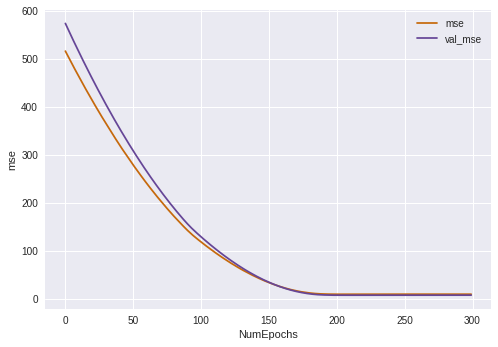

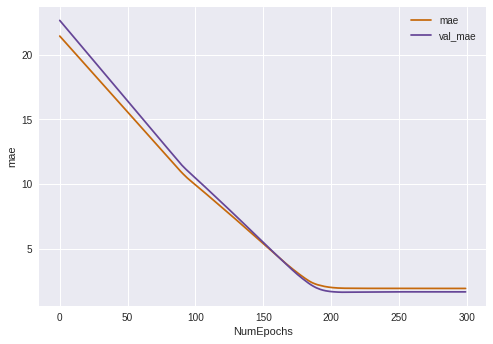

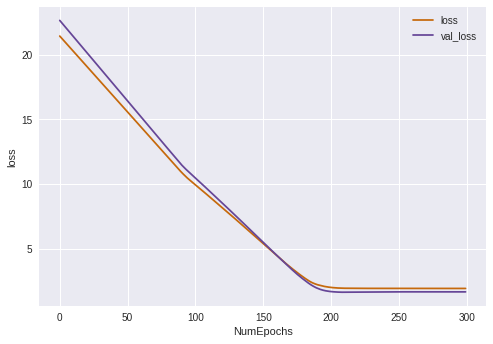

In [48]:
# tempString = 'mse'
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [50]:
model.predict([6])

array([[6.8759413]], dtype=float32)

In [54]:
# testPreds = model.predict(testFeatures).flatten() #array of all prediction values

temptlist = [1,2,3,4,5 ]

print(f'''

input List = {temptlist}


List of Predictions:
{model.predict(temptlist)}

List of Predictions (flattened out):
{model.predict(temptlist).flatten()}
''')



input List = [1, 2, 3, 4, 5]


List of Predictions:
[[2.6049085]
 [3.459115 ]
 [4.3133216]
 [5.167528 ]
 [6.0217347]]

List of Predictions (flattened out):
[2.6049085 3.459115  4.3133216 5.167528  6.0217347]



In [55]:
print(testFeatures)

     G1
9    14
25    6
28   11
31   17
32   17
..   ..
365  10
367   7
379  10
381   7
393  11

[79 rows x 1 columns]


In [56]:
testPreds = model.predict(testFeatures).flatten() #array of all prediction values

In [57]:
print(len(testPreds))
print(testPreds)

79
[13.709594   6.8759413 11.146975  16.272213  16.272213  12.001181
 13.709594  17.980627  17.980627   8.584354  13.709594  12.855387
  8.584354   7.730148   9.4385605 12.855387  11.146975  15.418007
  7.730148  10.292768  14.563801  12.855387  13.709594  15.418007
  7.730148   7.730148   8.584354  10.292768  12.001181  10.292768
 12.001181  12.855387  10.292768   6.8759413  9.4385605 12.001181
  7.730148   8.584354  13.709594   9.4385605  9.4385605  7.730148
 12.001181   6.8759413 12.855387   7.730148   7.730148  11.146975
 12.855387  16.272213  12.001181  14.563801   9.4385605 12.001181
 14.563801  12.001181  14.563801  12.001181  14.563801  11.146975
 12.001181   8.584354  15.418007   7.730148  15.418007  11.146975
 15.418007  12.855387   8.584354   8.584354  12.001181  17.12642
 12.855387  15.418007  10.292768   7.730148  10.292768   7.730148
 11.146975 ]


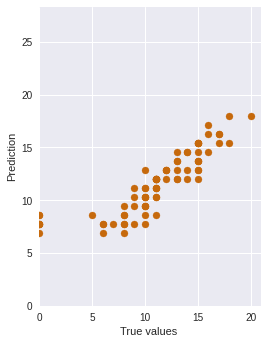

In [59]:
def plotGraph(labels  ,  predictions):
  plt.scatter(labels , predictions)
  plt.xlabel('True values ')
  plt.ylabel('Prediction')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

plotGraph(testLabels , testPreds)


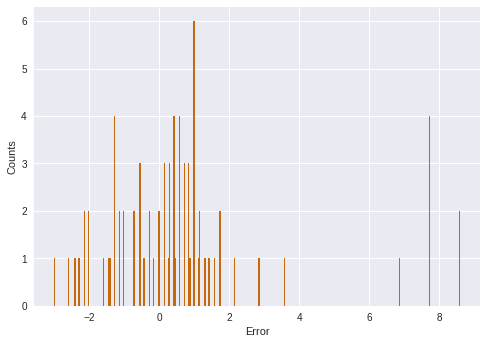

In [60]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)



Note:

Validation loss val_loss is a metric that tells you how much deviation from the actual label can you expect in the predicted label

To optimize your predicitons -->

    Hyperparameter tuning --> numEpochs, optimizer, learning_rate, lossFunctions

